# ***1. Load Libraries & and preprocessing the Data***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Prediction Modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Model Performance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.preprocessing import LabelEncoder

# Prediction Modeling

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.preprocessing import LabelEncoder

# Model Tuning
from sklearn.model_selection import GridSearchCV

# Check the model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#importing the data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample=pd.read_csv('/content/sample.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            1000 non-null   int64  
 1   Hospital_code                      1000 non-null   int64  
 2   Hospital_type_code                 1000 non-null   object 
 3   City_Code_Hospital                 1000 non-null   int64  
 4   Hospital_region_code               1000 non-null   object 
 5   Available Extra Rooms in Hospital  1000 non-null   int64  
 6   Department                         1000 non-null   object 
 7   Ward_Type                          1000 non-null   object 
 8   Ward_Facility_Code                 1000 non-null   object 
 9   Bed Grade                          999 non-null    float64
 10  patientid                          1000 non-null   int64  
 11  City_Code_Patient                  992 non-null    float6

In [ ]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [ ]:
train.Stay.value_counts()

Stay
21-30                 300
0-10                  246
31-40                 181
51-60                 124
41-50                  46
71-80                  40
81-90                  25
More than 100 Days     22
61-70                   8
91-100                  8
Name: count, dtype: int64

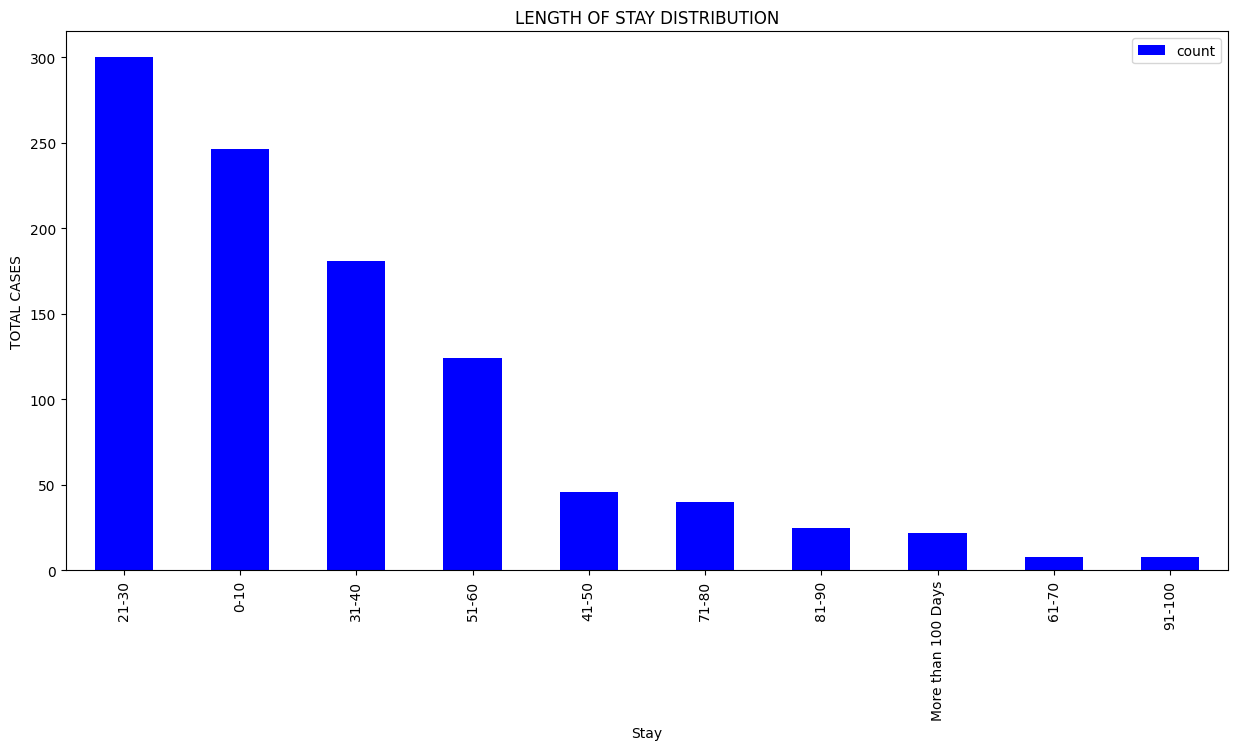

In [ ]:
# plotting the length of stay Distribution
plt.figure(figsize=(15,7)).set_figwidth(15)
plt.title("LENGTH OF STAY DISTRIBUTION")
plt.xlabel("NO OF DAYS")
plt.ylabel("TOTAL CASES")
legend=['LENGTH','DAYS']
train.Stay.value_counts().plot(kind="bar", color = ['blue'])
plt.legend()
plt.show()

Insight: Most of the patients stay in hospital for **21-30 days**, followed by **11-20**, **31-40**

# ***1.1 Univariate analysis***

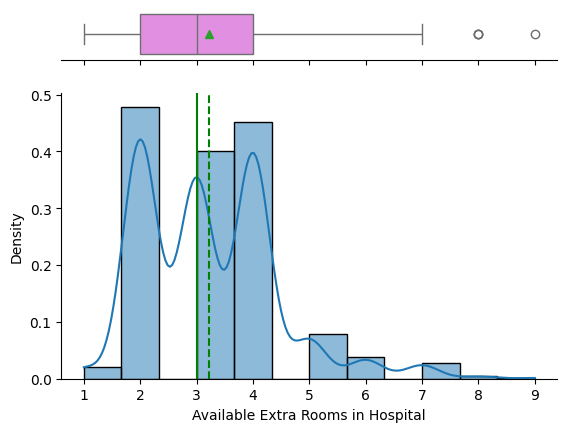

In [ ]:
#univariate analysis 1
x = train["Available Extra Rooms in Hospital"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

mean_value = np.mean(train["Available Extra Rooms in Hospital"])
median_value = np.median(train["Available Extra Rooms in Hospital"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Observations**


*   Bed space is a critical factor that impacts ability to take new admits within a hospital.
*   It is important for hospitals to maintain adequate bedspace to accommodate new patients
*   When looking at this chart, **the peak of the distribution appears to be between 2-4 with average of 3 beds available.**






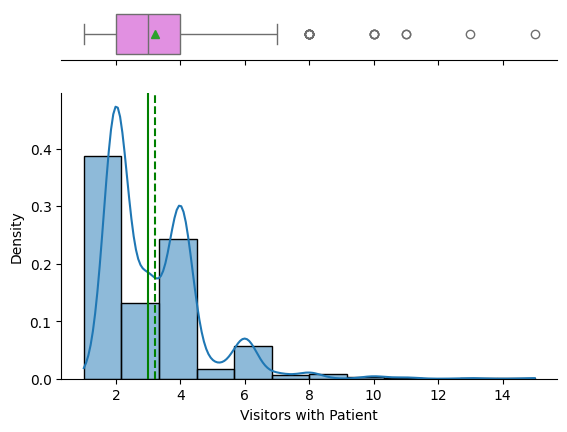

In [ ]:
#univariate analysis 2
x = train["Visitors with Patient"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

mean_value = np.mean(train["Visitors with Patient"])
median_value = np.median(train["Visitors with Patient"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


Observations

The majority of patients have between 1-3 visitors with average of 2 visitors

# ***1.2 Bivariate analysis***

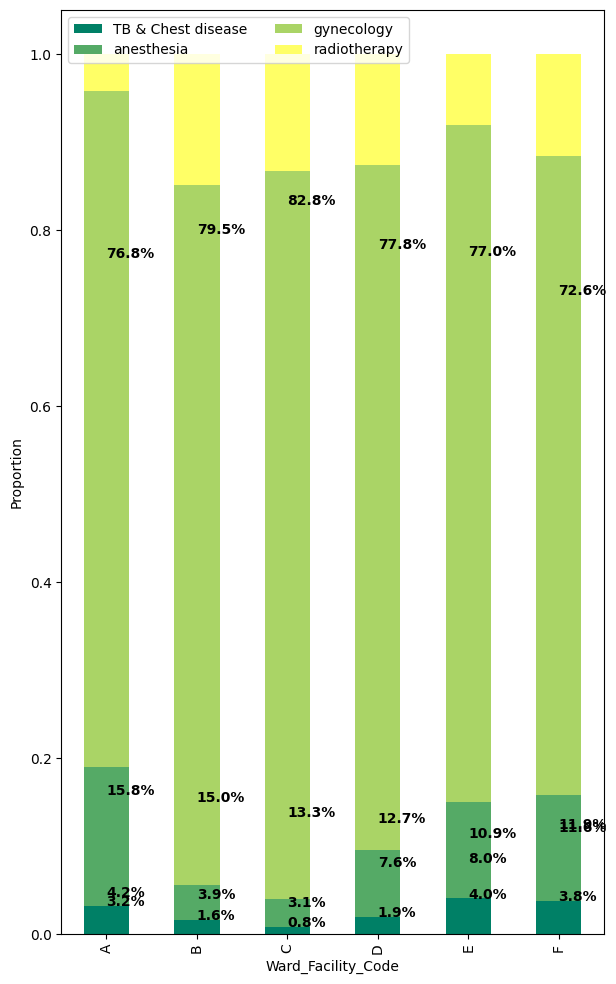

In [ ]:
#bivariate analysis 1
cross_tab = pd.crosstab(index=train['Ward_Facility_Code'],
                             columns=train['Department'])
cross_tab_prop = pd.crosstab(index=train['Ward_Facility_Code'],
                             columns=train['Department'],
                             normalize="index")

cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='summer',
                    figsize=(7,12))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Ward_Facility_Code")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

**Observations:**

In comparision ,Ward C has more gynecology facility with 82.8
followed by ward B with 79.5


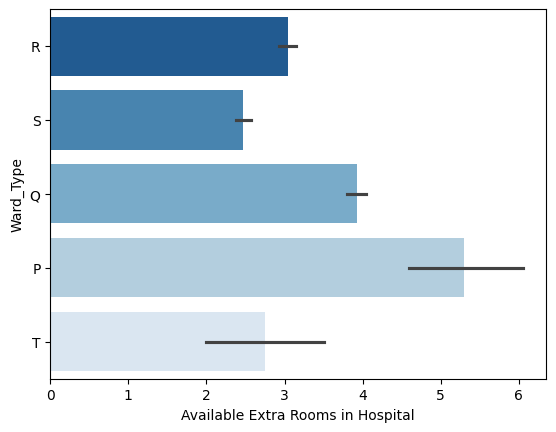

In [ ]:
#another bivariate analysis 3
sns.barplot(x = 'Available Extra Rooms in Hospital',y = 'Ward_Type', data = train, palette = "Blues_r")
plt.show()

**Observations:**

In comparision,Ward P has more extra rooms and Ward type S has the least.

In [ ]:
# Check for unique values in every column
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192 

In [ ]:
# Check for null values
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            1
patientid                            0
City_Code_Patient                    8
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

# ***2.Data Processing & Feature engineering***

In [ ]:
train = train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)

In [ ]:
# Combine test and train dataset for processing
combined = [train, test]

### 2a Encoding categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])

In [ ]:
combined[1].Department.unique()

array([2, 1, 0, 3, 4])

In [ ]:
# Ward type
for dataset in combined:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [ ]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,51-60,4911,0-10
1,2,2,2,5,2,3,3,5,1,0,2,51-60,5954,41-50
2,3,10,4,1,2,1,3,4,1,0,2,51-60,4745,31-40
3,4,26,1,2,2,3,2,3,1,0,2,51-60,7272,41-50
4,5,26,1,2,2,3,3,3,1,0,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,4,0,4,2,1,2,5,2,2,2,41-50,5641,21-30
996,997,23,0,6,4,2,1,5,1,2,8,41-50,4539,51-60
997,998,14,0,1,4,2,1,4,1,2,4,41-50,4673,21-30
998,999,13,0,5,4,2,2,5,0,0,3,51-60,4224,0-10


### 2b Binning features

In [ ]:
combined[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '0-10'], dtype=object)

In [ ]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [ ]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

In [ ]:
combined[0].Stay.unique()

array(['0-10', '41-50', '31-40', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
stay_dict = {'0-10': 5, '11-20': 15, '21-30': 25, '31-40': 35, '41-50': 45, '51-60': 55, '61-70': 65, '71-80': 75, '81-90': 85, '91-100': 95, 'More than 100 Days': 100 }

In [ ]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

<Axes: >

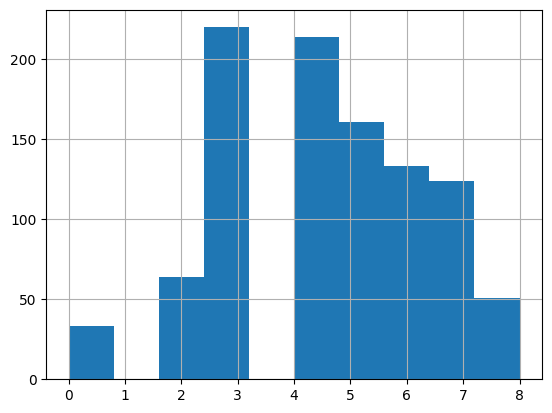

In [ ]:
combined[0].Age.hist()

**Observation**

This plot shows that majority of the patients are between 21-40

In [ ]:
combined[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   case_id                            1000 non-null   int64
 1   Hospital_code                      1000 non-null   int64
 2   Hospital_type_code                 1000 non-null   int64
 3   City_Code_Hospital                 1000 non-null   int64
 4   Available Extra Rooms in Hospital  1000 non-null   int64
 5   Department                         1000 non-null   int64
 6   Ward_Type                          1000 non-null   int64
 7   Ward_Facility_Code                 1000 non-null   int64
 8   Type of Admission                  1000 non-null   int64
 9   Severity of Illness                1000 non-null   int64
 10  Visitors with Patient              1000 non-null   int64
 11  Age                                1000 non-null   int64
 12  Admission_Deposit    

### 2c. Scaling numerical data

In [ ]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']

In [ ]:
len(columns_list)

4

In [ ]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for dataset in combined:
    dataset[columns_list]= ss.fit_transform(dataset[columns_list].values)


In [ ]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,-0.187236,3,2,5,-1.101698,0,-0.797339,5,0.105366,5
1,2,2,2,5,-1.015715,3,3,5,0.395174,0,-0.797339,5,1.098500,45
2,3,10,4,1,-1.015715,1,3,4,0.395174,0,-0.797339,5,-0.052698,35
3,4,26,1,2,-1.015715,3,2,3,0.395174,0,-0.797339,5,2.353487,45
4,5,26,1,2,-1.015715,3,3,3,0.395174,0,-0.797339,5,0.721433,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,4,0,4,-1.015715,1,2,5,1.892046,2,-0.797339,4,0.800464,25
996,997,23,0,6,0.641243,2,1,5,0.395174,2,3.143380,4,-0.248849,55
997,998,14,0,1,0.641243,2,1,4,0.395174,2,0.516234,4,-0.121256,25
998,999,13,0,5,0.641243,2,2,5,-1.101698,0,-0.140552,5,-0.548789,5


# ***3.Data Modelling***

In [ ]:
x = train.drop('Stay',axis=1)

y = train['Stay']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
#Calculate Adjusted R2
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Compute different metrics to check regression model performance
def model_performance_regression(model, predictors, target):
    """
    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)

    adjr2 = adj_r2_score(predictors, target, pred)

    rmse = np.sqrt(mean_squared_error(target, pred))

    mae = mean_absolute_error(target, pred)

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },

        index = [0],
    )

    return df_perf

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())-10

# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))-10

# Model performance on the test and the train data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Prediction on the training data
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on the test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],

                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
import statsmodels.api as sm
x_train1 = sm.add_constant(x_train)
x_test1 = sm.add_constant(x_test)
olsmodel1 = sm.OLS(y_train, x_train1).fit()
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Stay   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     44.26
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.06e-84
Time:                        12:21:32   Log-Likelihood:                -3448.8
No. Observations:                 800   AIC:                             6926.
Df Residuals:                     786   BIC:                             6991.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                20.9906      4.345      4.831      0.000      12.461      29.520
case_id                               0.0016      0.002      0.696      0.487      -0.003       0.006
Hospital_code                         0.1563      0.078      2.013      0.044       0.004       0.309
Hospital_type_code                   -0.1836      0.428     -0.428      0.668      -1.025       0.658
City_Code_Hospital                   -0.6510      0.210     -3.106      0.002      -1.063      -0.240
Available Extra Rooms in Hospital    -1.5458      0.762     -2.029      0.043      -3.041      -0.051
Department                            1.1865      1.210      0.981      0.327      -1.188       3.561
Ward_Type                             7.0258      0.956      7.349      0.000       5.149       8.902
Ward_Facility_Code                   -0.7028      0.398     -1.764      0.078      -1.485       0.079
Type of Admission                     1.8890      0.658      2.871      0.004       0.597       3.181
Severity of Illness                  -1.4434      0.714     -2.022      0.043      -2.845      -0.042
Visitors with Patient                14.7230      0.730     20.179      0.000      13.291      16.155
Age                                   0.0628      0.363      0.173      0.862      -0.649       0.775
Admission_Deposit                    -0.2976      0.684     -0.435      0.664      -1.640       1.045
==============================================================================
Omnibus:                       23.007   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.338
Skew:                           0.353   Prob(JB):                     1.91e-06
Kurtosis:                       3.539   Cond. No.                     3.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **3.1** ***Linear regression model***

In [ ]:
#linear regression
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared
0,8.506253,4.410084,0.338391,0.288323


In [ ]:
#ridge regression
rdg = Ridge()
rdg.fit(x_train, y_train)
ridge_regression_perf_test = model_performance_regression(rdg, x_test, y_test)
ridge_regression_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,8.499579,4.405445,0.338868,0.29266


linear regression and ridge regression provide similar results

In [ ]:
model_pref(olsmodel1, x_train1, x_test1, y_train,y_test)

    Data      RMSE       MAE
0  Train  8.030733  4.235223
1   Test  8.506253  4.410084


# ***3.2 Non linear regression model***

In [ ]:
#Decision tree
dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(x_train, y_train)
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,11.823153,5.1,0.079976,0.015673


In [ ]:
#bagging
bagging_estimator = BaggingRegressor(random_state = 1)
bagging_estimator.fit(x_train, y_train)
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,6.224095,2.6625,0.491507,0.455967


In [ ]:
# Random Forest
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor.fit(x_train, y_train)
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)
regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,6.644596,2.37675,0.464806,0.4274


In [ ]:
#tuning the dt parameters
rf_tuned = RandomForestRegressor(random_state = 1)

parameters = {"n_estimators": [110, 120],
    "max_depth": [5, 7],
    "max_features": [0.8, 1]}

scorer = make_scorer(r2_score)

# Grid Search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [ ]:
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)
rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,6.558434,2.073734,0.470333,0.433313


In [ ]:
models_test_comp_df = pd.concat(
    [   lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Bagging regressor",
    "Random Forest regressor",
    "Tuned Random Forest Regressor"

    ]

print("Test performance comparison:")

models_test_comp_df

Test performance comparison:


,Linear Regression,Ridge Regression,Decision tree regressor,Bagging regressor,Random Forest regressor,Tuned Random Forest Regressor
RMSE,8.506253,8.499579,11.823153,6.224095,6.644596,6.558434
MAE,4.410084,4.405445,5.100000,2.662500,2.376750,2.073734
R-squared,0.338391,0.338868,0.079976,0.491507,0.464806,0.470333
Adj. R-squared,0.288323,0.292660,0.015673,0.455967,0.427400,0.433313


**Observations:**
*   In comparison to the linear and ridge regression models, all the other models demonstrate improved performance except decision tree.
*   
The bagging and random forest models perform better than a single decision tree


*   **The random forest model with modified parameters performs the best amongst all the models**





# **4.Prediction and interpretation**

In [ ]:
#performing predictions using tuned regression
Y_pred =  regressor.predict(x_test)

In [ ]:
submission = pd.DataFrame({
        "case_id": sample["case_id"],
        "Stay(Prediction)":Y_pred
})

In [ ]:
submission.to_csv('submission.csv', index = True)

In [ ]:
#output interpretation
submission

,case_id,Stay(Prediction)
0,1001,23.10
1,1002,41.70
2,1003,16.50
3,1004,14.10
4,1005,21.50
5,1006,27.10
6,1007,53.05
7,1008,19.60
8,1009,29.30
9,1010,58.90


# ***1.3 Other univariate and bivariate analysis***

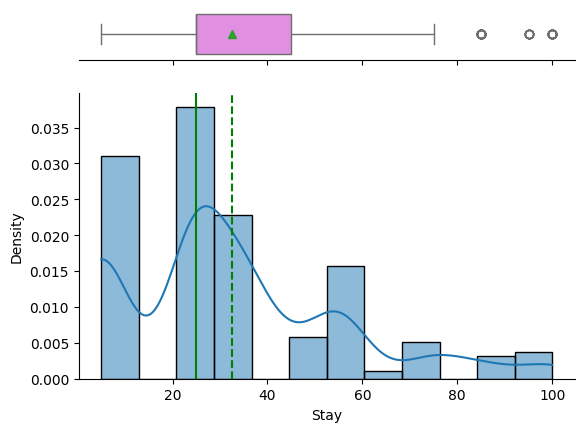

In [ ]:
#another univariate analysis 3
x = train["Stay"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

mean_value = np.mean(train["Stay"])
median_value = np.median(train["Stay"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


**Observation**

The peak of the distribution indicates that most patients stay for 25-35 days.

<Axes: >

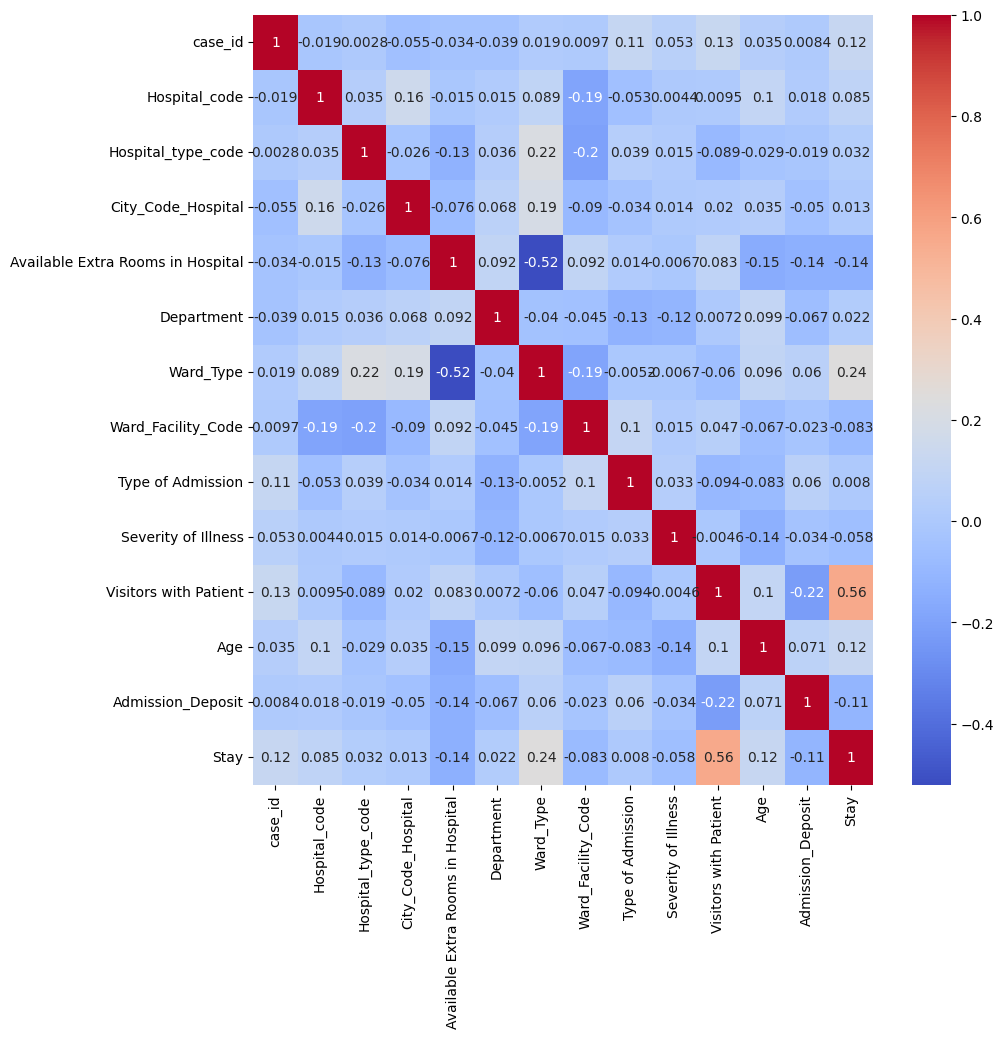

In [ ]:
#bivariate analysis 2
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

# ***5.SHapley Additive exPlanations***

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(regressor)

In [ ]:
shap_values = explainer.shap_values(x_train)

In [ ]:
shap_values[1]

array([  2.23358193,  -0.67138116,  -0.02383549,   1.06311289,
         0.09434976,   0.06100947, -11.41412252,  -0.60418386,
         0.28396467,  -0.36107895,   2.89219491,   0.09213079,
         0.45307004])

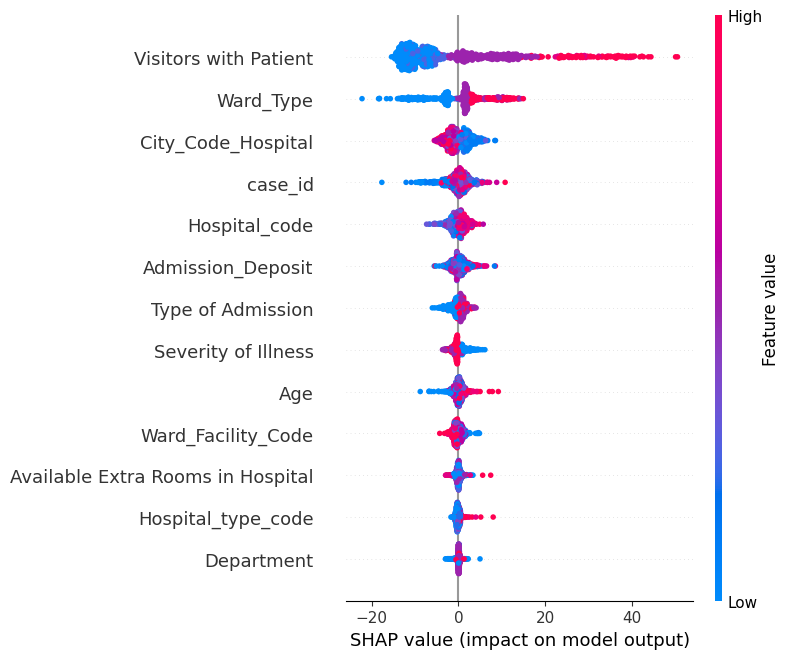

In [ ]:
# plotting the dependence of shapely values on all the features
shap.summary_plot(shap_values, x_train)

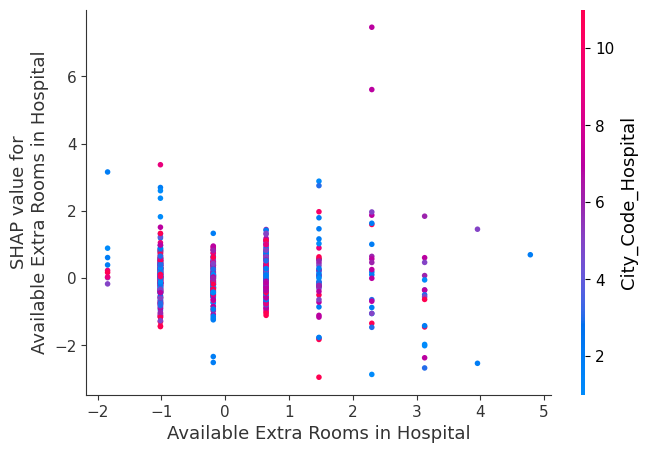

In [ ]:
# plotting the dependence of shapely values of severity based on age
shap.dependence_plot('Available Extra Rooms in Hospital', shap_values, x_train)

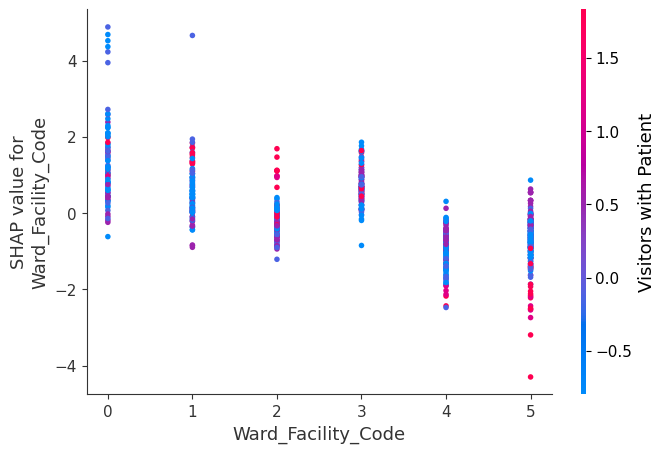

In [ ]:
shap.dependence_plot('Ward_Facility_Code', shap_values, x_train)

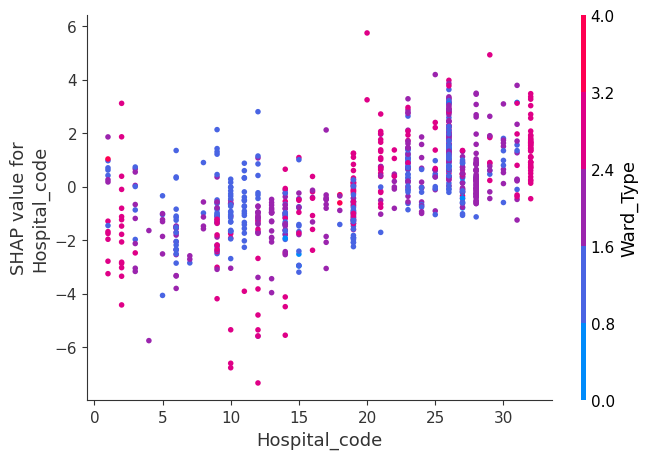

In [ ]:
shap.dependence_plot('Hospital_code', shap_values, x_train)